# E-commerce Shipping Data Analysis

## Content
<p>1. Introduction</p>
<p>2. Objective</p>
<p>3. Getting to Know Data & Variables</p>
<p>4. Data Preparation</p>
<p>5. Data Analysis</p>
<p>6. Modelling & Assessment</p>
<p>7. Conclusion</p>
<p>8. Reference</p>

## 1. Introduction
<p>An international e-commerce company reqeusts data team to discover key insights from customers databse by advance statistical methods and share the result to other teams for improvement project. The company sells electronic products.</p>

## 2. Objective
<p>To initiate service level improvement project for Sales and Operation team.</p>

## 3. Getting to Know Data & Variables

### 3.1 Data Import
<p>Data in csv format is imported.</p>

In [1]:
#Import packages
import pandas as pd
import numpy as np

#Import Data
df = pd.read_csv ("Train.csv")

### 3.2 Data Preview

In [2]:
#Data preview
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


<br></br>
<p>From the preview, columns needed to be renamed and looks tidier.</p>
<br></br>

In [3]:
#Tidy up of columns' names
df.rename(columns = {'Warehouse_block':'Warehouse_Block','Customer_care_calls':'Customer_Care_Calls', 'Customer_rating':'Customer_Rating', 'Cost_of_the_Product':'Cost_of_Product', 'Prior_purchases':'Prior_Purchases', 'Product_importance':'Product_Importance','Discount_offered':'Discount_Offered','Reached.on.Time_Y.N':'Reached_on_Time'}, inplace = True)

#Statistics Summary
print(df.describe())
df.info()

                ID  Customer_Care_Calls  Customer_Rating  Cost_of_Product  \
count  10999.00000         10999.000000     10999.000000     10999.000000   
mean    5500.00000             4.054459         2.990545       210.196836   
std     3175.28214             1.141490         1.413603        48.063272   
min        1.00000             2.000000         1.000000        96.000000   
25%     2750.50000             3.000000         2.000000       169.000000   
50%     5500.00000             4.000000         3.000000       214.000000   
75%     8249.50000             5.000000         4.000000       251.000000   
max    10999.00000             7.000000         5.000000       310.000000   

       Prior_Purchases  Discount_Offered  Weight_in_gms  Reached_on_Time  
count     10999.000000      10999.000000   10999.000000     10999.000000  
mean          3.567597         13.373216    3634.016729         0.596691  
std           1.522860         16.205527    1635.377251         0.490584  
min   

<br></br>
<p>There are 10,999 records with 12 variables. Below table shows summary of the variales' description and data type.</p>
<br></br>

|   **Variable**    |                           **Description**                   |  **Data Type**  |
|:-----------------:|:------------------------------------------------------------|:----------------|
|ID                 |ID No. of Customers.                                         |Nominal Number   |
|Warehouse Block    |A to E Warehouse block.                                      |Character        | 
|Mode of Shipment   |Ship products by Ship/Flight/Road.                           |Character        | 
|Customer Care Calls|No. of enquiry calls for shipment.                           |Discrete Number  | 
|Customer Rating    |Company is rated by customers.1 is the worst & 5 is the best.|Ordinal Number   | 
|Cost of Product    |Cost of products in USD.                                     |Continuous Number| 
|Prior Purchases    |No. of prior purchases.                                      |Discrete Number  | 
|Product Importance |Company categorizes products in low, medium and high.        |Character        | 
|Gender             |Gender of customers, F/M.                                    |Character        | 
|Discount Offered   |Discount offered on the specific product.                    |Continuous Number| 
|Weight in gms      |Weight of product in grams.                                  |Continuous Number| 
|Reached on Time    |1: Not reach on time 0: Reach on time                        |Binary Number    |

<br></br>
<p>There are 4 variables for character and 8 variables for number. "Reached on Time" and "Customer Rating" can be the target variables for Sales and Operation team to evaluate the service level.</p>
<br></br>

## 4. Data Preparation
### 4.1 Missing Values Detection

In [4]:
#View statistical summary
df.isnull().sum()

ID                     0
Warehouse_Block        0
Mode_of_Shipment       0
Customer_Care_Calls    0
Customer_Rating        0
Cost_of_Product        0
Prior_Purchases        0
Product_Importance     0
Gender                 0
Discount_Offered       0
Weight_in_gms          0
Reached_on_Time        0
dtype: int64

<br></br>
<p>No missing values are found as no NA values are displayed from table.</p>
<br></br>

### 4.2 Outliers Detection
#### 4.2.1 Variables with Continuous and Discrete Values
<p>Boxplot is used to detect outliers for variables with continuous and discrete values.</p>

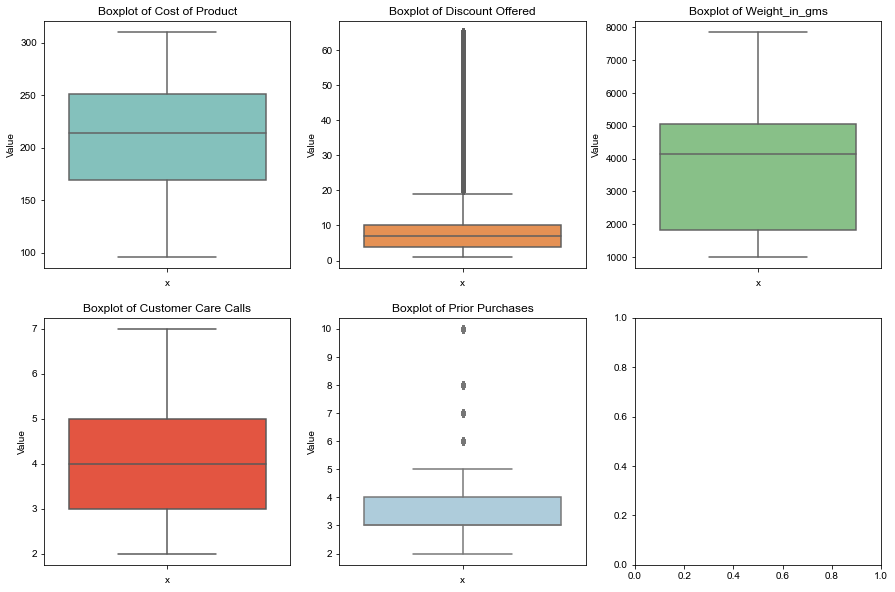

In [5]:
#Import packages
import seaborn as sns
import matplotlib.pyplot as plt

#Mulitple plots on the same page
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

#Boxplot for variables with continuous & discrete values
sns.set_theme(style = "darkgrid")
p1 = sns.boxplot(y = df["Cost_of_Product"], palette = "GnBu", ax = axes[0,0]).set(title = "Boxplot of Cost of Product", xlabel = "x", ylabel = "Value")
p2 = sns.boxplot(y = df["Discount_Offered"], palette = "YlOrRd_r", ax = axes[0,1]).set(title = "Boxplot of Discount Offered", xlabel = "x", ylabel = "Value")
p3 = sns.boxplot(y = df["Weight_in_gms"], palette = "Accent", ax = axes[0,2]).set(title = "Boxplot of Weight_in_gms", xlabel = "x", ylabel = "Value")
p4 = sns.boxplot(y = df["Customer_Care_Calls"], palette = "CMRmap", ax = axes[1,0]).set(title = "Boxplot of Customer Care Calls", xlabel = "x", ylabel = "Value")
p5 = sns.boxplot(y = df["Prior_Purchases"], palette = "Paired", ax=axes[1,1]).set(title = "Boxplot of Prior Purchases", xlabel = "x", ylabel = "Value")

<br></br>
<p>In the boxplot of Discount Offered and Prior Purchases, there are data points larger than maximum that are outliers.</p>
<br></br>

In [6]:
#Import packages
from scipy.stats import iqr
import statistics

#Find out outliers from the boxplot in Discount Offered
y = np.quantile(df.Discount_Offered,0.75) + 1.5 * iqr(df.Discount_Offered)
print("Value of Outliers in Discount Offered: >", y)
y1 = df[df.Discount_Offered > y].shape[0]
print("No. of Outliers in Discount Offered:", y1)

#Find out outliers from the boxplot in Prior Purchases
w = np.quantile(df.Prior_Purchases,0.75) + 1.5 * iqr(df.Prior_Purchases)
print("Value of Outliers in Prior Purchases: >", w)
w1 = df[df.Prior_Purchases > w].shape[0]
print("No. of Outliers in Prior Purchases:", w1)

#Remove outliers from Data
df1 = df[(df.Discount_Offered <= y) & (df.Prior_Purchases <= w)]
print(df1.shape)

#Find out median without outliers
med1 = statistics.median(df1.Discount_Offered)
med2 = statistics.median (df1.Prior_Purchases)

#Replace outliers by respective median 
df.loc[df.Discount_Offered > y, 'Discount_Offered'] = med1
df.loc[df.Prior_Purchases > w, 'Prior_Purchases'] = med2

print(df.describe())


Value of Outliers in Discount Offered: > 19.0
No. of Outliers in Discount Offered: 2209
Value of Outliers in Prior Purchases: > 5.5
No. of Outliers in Prior Purchases: 1003
(7971, 12)
                ID  Customer_Care_Calls  Customer_Rating  Cost_of_Product  \
count  10999.00000         10999.000000     10999.000000     10999.000000   
mean    5500.00000             4.054459         2.990545       210.196836   
std     3175.28214             1.141490         1.413603        48.063272   
min        1.00000             2.000000         1.000000        96.000000   
25%     2750.50000             3.000000         2.000000       169.000000   
50%     5500.00000             4.000000         3.000000       214.000000   
75%     8249.50000             5.000000         4.000000       251.000000   
max    10999.00000             7.000000         5.000000       310.000000   

       Prior_Purchases  Discount_Offered  Weight_in_gms  Reached_on_Time  
count     10999.000000      10999.000000   1099

<br></br>
<p>If outliers are removed and deleted in rows, sample size will be reduced by 28%.This can distort data distribution.Outliers in Discount Offered and Prior Purchases are replaced by respective median to improve data accuracy.</p>
<br></br>

## 5. Data Analysis
<p>Customer Rating is the target variable to measure service level performance. Visualise the relationship bewteen Reached on Time and Customer Rating. More details are shown as below.</p>

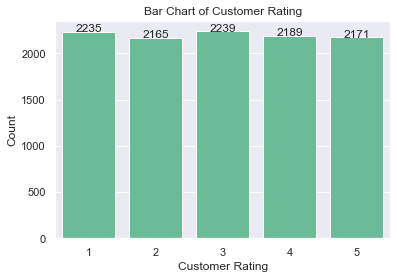

In [7]:
#Bar chart of Customer Rating
sns.set(style = "darkgrid")
p6 = sns.countplot(x = "Customer_Rating", data = df, color = "#5EC899")
p6.set_title("Bar Chart of Customer Rating")
p6.set_xlabel("Customer Rating")
p6.set_ylabel("Count")

for i in p6.patches:
    p6.annotate('{:.0f}'.format(i.get_height()), (i.get_x() + 0.2, i.get_height()))

<br></br>
<p>There is even distribution in Customer Rating. </p>
<br></br>

### 5.1 Reached on Time & Customer Rating
<p>Reached on Time is selected to evaluate Customer Rating as punctual shipping service is one of the basic reqiurements from customers.</p>

Text(0, 0.5, 'Percentage')

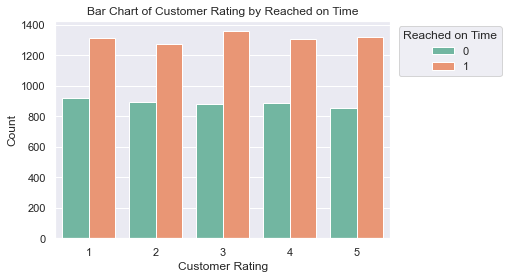

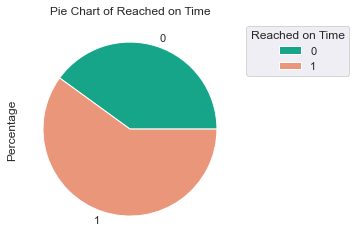

In [8]:
#Bar chart of Reached on Time
sns.set(style = "darkgrid")
p7 = sns.countplot(x = "Customer_Rating", hue = "Reached_on_Time", data = df, palette="Set2")
p7.set_title("Bar Chart of Customer Rating by Reached on Time")
p7.set_xlabel("Customer Rating")
p7.set_ylabel("Count")
p7.legend(bbox_to_anchor = (1.01, 1), title = "Reached on Time")

#Pie chart of Reached on Time
#Compute percentages for Reached on Time
reach = df.shape[0]
reach0 = df[df.Reached_on_Time == 0].shape[0]
reach1 = df[df.Reached_on_Time == 1].shape[0]
reach0p = round(reach0 / reach * 100)
reach1p = round(reach1 / reach * 100)

#Data frame of pie chart
data = {"Reached_on_Time":["0","1"], "Distribution_Percentage":[reach0p, reach1p]}
df_pie = pd.DataFrame(data)

#Pie chart
colors = ["#17A589", "#E9967A"]
p8 = df_pie.plot.pie(y = "Distribution_Percentage", colors = colors)
p8.set_title("Pie Chart of Reached on Time")
p8.legend(bbox_to_anchor = (1.01, 1), title = "Reached on Time")
p8.set_ylabel("Percentage")

<br></br>
<p>The customer rating distribution is even for both delivery conditions, reached on time and not reached on time. So, delivery time is not the key factor to affect customer rating. However, more than half of prodcuts can't reach on time that is the trigger point to know reason behind and suggest potential improvement. Mode of Shipment, Warehouse Block and Weight in gms are selected to investigate the delivery service perforamnce.</p>
<br></br>

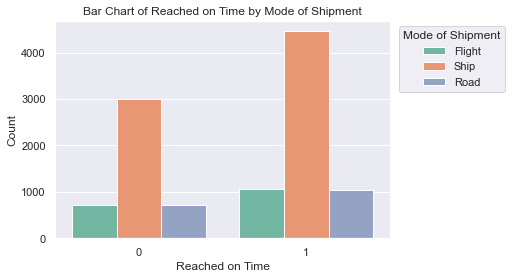

In [9]:
#Bar chart of Reached on Time by Mode of Shipment
sns.set(style = "darkgrid")
p9 = sns.countplot(x = "Reached_on_Time", hue = "Mode_of_Shipment", data = df, palette="Set2")
p9.set_title("Bar Chart of Reached on Time by Mode of Shipment")
p9.set_xlabel("Reached on Time")
p9.set_ylabel("Count")
p9.legend(bbox_to_anchor = (1.01, 1), title = "Mode of Shipment")

<br></br>
<p>The delivery performance of all three modes is bad. Shipping is the most common delivery method in this company. To maximize the improvement on delivery performance, we can communicate with operation team and know more about the operation flow of shipping.</p>
<br></br>

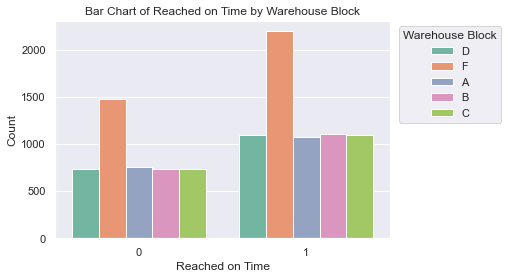

In [10]:
#Bar chart of Reached on Time by Warehouse Block
sns.set(style = "darkgrid")
p10 = sns.countplot(x = "Reached_on_Time", hue = "Warehouse_Block" , data = df, palette="Set2")
p10.set_title("Bar Chart of Reached on Time by Warehouse Block")
p10.set_xlabel("Reached on Time")
p10.set_ylabel("Count")
p10.legend(bbox_to_anchor = (1.01, 1), title = "Warehouse Block")

<br></br>
<p>The delivery performance of all six warehouse is bad. Warehouse Block F is the busiest block in this company. To maximize the improvement on delivery performance, we can communicate with operation team and know more about the operation flow in Warehouse Block F.</p>
<br></br>

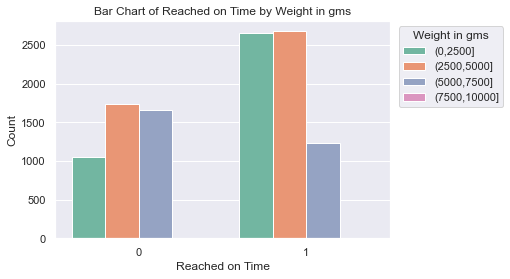

In [11]:
#Create new column to categorize Weight in gms
Weight_in_gms1 = pd.cut(df.Weight_in_gms, bins = [0, 2500, 5000, 7500, 10000] , labels = ["(0,2500]", "(2500,5000]", "(5000,7500]", "(7500,10000]"])
df.insert(5, "Weight_in_gms1", Weight_in_gms1)

#Bar chart of Reached on Time by Weight in gms1
sns.set(style = "darkgrid")
p11 = sns.countplot(x = "Reached_on_Time", hue = "Weight_in_gms1" , data = df, palette="Set2")
p11.set_title("Bar Chart of Reached on Time by Weight in gms")
p11.set_xlabel("Reached on Time")
p11.set_ylabel("Count")
p11.legend(bbox_to_anchor = (1.01, 1), title = "Weight in gms")


<br></br>
<p>Wight in gms is transformed from continuous to categorical variable by grouping into 4 groups, (0,2500], (2500,5000] (5000,7500] and (7500,10000] which can helps to visualise the relationship between Reached on Time and Weight in gms.</p>
<p>Group (5000,7500] have better delivery performance than group (0,2500], (2500,5000]and (7500,10000] as more than 50% of products delivered on time.</p>
<br></br>

<br></br>
<p>In conclusion, delivery time is not the key factor to determine cusotmer rating. However, it is important to address that more than half of products can't be delivered on time. More details of shipping mode, Warehouse Block F and weight group (0,2500] and (2500,5000] should be found to initiate delivery time improvement project. </p>
<br></br>

### 5.2 Highest & Lowest Customer Rating 

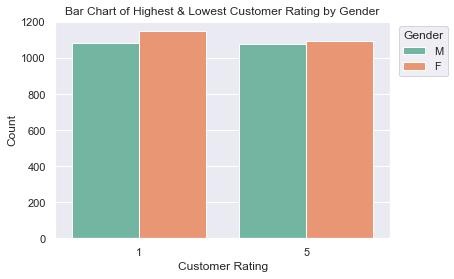

In [12]:
#Data with highest & lowest Customer Rating
df2 = df[(df.Customer_Rating == 1) | (df.Customer_Rating == 5)]

#Bar Chart of Highest & Lowest Customer Rating by Gender
sns.set(style = "darkgrid")
p12 = sns.countplot(x = "Customer_Rating", hue = "Gender" , data = df2, palette="Set2")
p12.set_title("Bar Chart of Highest & Lowest Customer Rating by Gender")
p12.set_xlabel("Customer Rating")
p12.set_ylabel("Count")
p12.legend(bbox_to_anchor = (1.01, 1), title = "Gender")

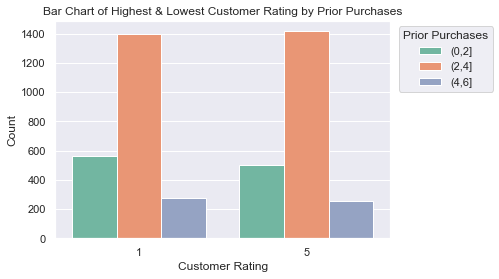

In [13]:
#Create new column to categorize Prior Purchases
Prior_Purchases1 = pd.cut(df2.Prior_Purchases, bins = [0, 2, 4, 6] , labels = ["(0,2]", "(2,4]", "(4,6]"])
df2.insert(4, "Prior_Purchases1", Prior_Purchases1)

#Bar chart of Highest & Lowest Customer Rating by Prior Purchases
sns.set(style = "darkgrid")
p11 = sns.countplot(x = "Customer_Rating", hue = "Prior_Purchases1" , data = df2, palette="Set2")
p11.set_title("Bar Chart of Highest & Lowest Customer Rating by Prior Purchases")
p11.set_xlabel("Customer Rating")
p11.set_ylabel("Count")
p11.legend(bbox_to_anchor = (1.01, 1), title = "Prior Purchases")

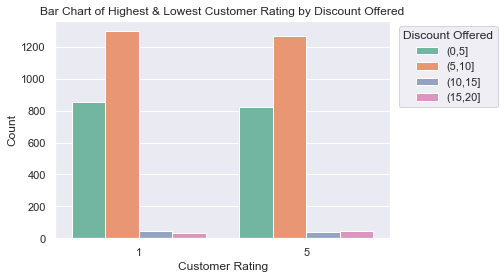

In [14]:
#Create new column to categorize Discount Offered
Discount_Offered1 = pd.cut(df2.Discount_Offered, bins = [0, 5, 10, 15, 20] , labels = ["(0,5]", "(5,10]", "(10,15]", "(15,20]"])
df2.insert(5, "Discount_Offered1", Discount_Offered1)

#Bar chart of Highest & Lowest Customer Rating by Prior Purchases
sns.set(style = "darkgrid")
p11 = sns.countplot(x = "Customer_Rating", hue = "Discount_Offered1" , data = df2, palette="Set2")
p11.set_title("Bar Chart of Highest & Lowest Customer Rating by Discount Offered")
p11.set_xlabel("Customer Rating")
p11.set_ylabel("Count")
p11.legend(bbox_to_anchor = (1.01, 1), title = "Discount Offered")

<br></br>
<p>Focused on the highest and lowest Customer Rating, it is difficult to find the rating reason by Gender, Prior Purchases and Discount Offered. Gender distribution between them is similar. More, most of them have 2 to 4 times of prior purchases and get 5 to 10 dollars discount.</p>
<br></br>

### 5.3 Correlation among Variables

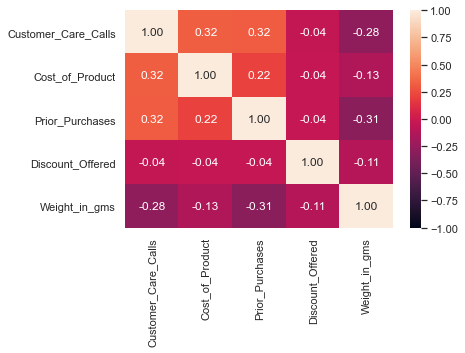

In [15]:
#Correlation of data
corr = df.iloc[:, [3,6,7,10,11]].corr() 
p15 = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True, fmt = '0.2f')

<br></br>
<p>(1) Customers Care Calls & Cost of Product, (2) Customers Care Calls & Prior Purchases, and (3) Cost of Product & Prior Purchases have weak positive relationship. One variable increases, another variable also increases.</p>
<p>(4) Customers Care Calls & Weight in gms, (5) Cost of Product & Weight in gms, and (6) Prior Purchases & Weight in gms have weak negative relationship. One variable increases, another variable decreases.</p>
<br></br>

## 6. Modelling & Assessment
### 6.1 Objective
<p>To predict Reached on Time by logistic regression.</p>

### 6.2 Transformation
#### 6.2.1 Transformation for Continuous and Discrete Variables

In [16]:
#Variance of continuous and discrete Variables
var_vector = df.iloc[:, [3,6,7,10,11]].var()
max(var_vector) / min(var_vector)

3099598.9822483477

<br></br>
<p>The variations of variables diff greatly and the variables are in different units, so standardization is used to prevent some variables dominating the result.</p>
<br></br>

In [17]:
#Import packages
from sklearn import preprocessing

#Standardization of continuous and discrete Variables
s = preprocessing.scale(df.iloc[:, [3,6,7,10,11]])
df.iloc[:, [3,6,7,10,11]] = s

### 6.3 Analysis

In [22]:
#Import packages
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm
import statsmodels.api as sm

#Split data into features and target variable
x = df.iloc[:, [3,4,6,7,10,11]]
y = df.Reached_on_Time

#Split data into training Data and testing Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3)

#Logistic regression
logreg = sm.GLM.from_formula("Reached_on_Time ~ Customer_Care_Calls + Customer_Rating + Cost_of_Product + Prior_Purchases + Discount_Offered + Weight_in_gms", family = sm.families.Binomial(), data = df)
result = logreg.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        Reached_on_Time   No. Observations:                10999
Model:                            GLM   Df Residuals:                    10992
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6682.0
Date:                Sun, 25 Jul 2021   Deviance:                       13364.
Time:                        16:00:16   Pearson chi2:                 1.06e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.3984    

<br></br>
<p>Backware elimination is performed to access final model. From the result, Customer Rating is removed from data as it has large p-value.</p>
<br></br>

In [51]:
#Logistic regression
logreg = sm.GLM.from_formula("Reached_on_Time ~ Customer_Care_Calls + Cost_of_Product + Prior_Purchases + Discount_Offered + Weight_in_gms", family = sm.families.Binomial(), data = df)
result = logreg.fit()
print(result.summary())

#Logistic regression assessment
y_pred = result.predict(x_train)
y_pred1 = y_pred > 0.5

#Classification table
t1 = pd.crosstab(index = y_pred1 , columns = y_train) 
print(t1)

                 Generalized Linear Model Regression Results                  
Dep. Variable:        Reached_on_Time   No. Observations:                10999
Model:                            GLM   Df Residuals:                    10993
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6683.3
Date:                Sun, 25 Jul 2021   Deviance:                       13367.
Time:                        16:58:03   Pearson chi2:                 1.06e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.4690    

<br></br>
<p>For the finalized logistic regression model, Customer Care Calls, Cost of Product, Prior Purchases, Discount Offered, Weight in gms have small p-values. With 95% confidence level, assume that there is an association between Reached on Time and these independent variables. All varibles, except Discount Offered, have negative relationship with the target variable.</p>
<br></br>

In [96]:
#Prediction of testing data
y_pred2 = result.predict(x_test)
y_pred3 = y_pred2 > 0.5

#Classification table
t2 = pd.crosstab(index = y_pred3 , columns = y_test) 
print(t2)

#Prediction assessment
total_sum = t2.iloc[0, 0] + t2.iloc[0, 1] + t2.iloc[1, 0] + t2.iloc[1, 1]
accuracy = round(np.trace(t2) / total_sum, 2)
print("Accuracy:", accuracy)

sum_secondrow = t2.iloc[1, 0] + t2.iloc[1, 1]
precision = round(t2.iloc[1, 1] / sum_secondrow, 2)
print("Precision:", precision)

sum_secondcolumn = t2.iloc[0, 1] + t2.iloc[1, 1]
recall = round(t2.iloc[1, 1] / sum_secondcolumn, 2)
print("Recall:", recall)

F1 = round((2 * precision * recall) / (precision + recall), 2)
print("F1 Score:", F1)

Reached_on_Time    0     1
row_0                     
False            622   499
True             866  1680
Accuracy: 0.63
Precision: 0.66
Recall: 0.77
F1 Score: 0.71


<br></br>
<p>Four measures are chosen to assess this model, accuracy, precision, recall, and F1 score. Accuracy is not good, only 0.63 of probability to make correct predictions (TP & TN) over the entire data. As it is intuitive measurement, more details are drilled by precision, recall and F1 score.</p>

<p>Precision is higher than accuracy. It has 0.67 of probability to make true positive over all positive predictions made (i.e. TP / (TP + FP)). If there is false postive in prediciton, the company may need to compensate for delivery delay and get bad influence on reputation.</p>

<p>Recall is higher than accuracy. It has 0.77 of probability to true postive over all positive cases in data (i.e. TP / (TP + FN)). If there is false negative in prediction, the company may get loss of wrong compensation cost and bad reputation for fake delayed devliery. </p>

<p>F1 score is higher than accuracy. It is harmonic mean of precision and recall and more resistant to outliers. It is applied in this model as data is imbablanced and positive cases are much less than negative cases.</p>

<p>In conclusion, this model has good performance for prediction. It can help the company can to prepare operation and business plans under different scenarios, such as delivery insurance, urgent delivery arrangement, etc.</p>

<br></br>

## 7. Conclusion

<br></br>
<p>In conclusion, serivce level and customer rating are not good in this company. More details should be provided by the company for improvement projects. A logistic regression model is bulit for delivery time prediction to prepare for incidents.</p>
<br></br>

## 8. Reference
### (1) Kaggle, E-Commerce Shipping Data
<p>Prachi Gopalani (Mar 2021). E-Commerce Shipping Data.</p>
<p>https://www.kaggle.com/prachi13/customer-analytics</p>